In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [2]:
from Data.Data_Module import Data_Module
from Models.Printed_Tex_Transformer import ResNetTransformer
from Lightning_Models.Printed_Tex_Lit_Model import LitResNetTransformer
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from PIL import Image
import torch
from pytorch_lightning.loggers import TensorBoardLogger
from torchvision import transforms
from PIL import Image
from IPython.display import display, Math
from Data.image_transforms import Image_Transforms


dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
# Generate Data Module by uploading images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt

dataset = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=250*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.999,
                   vocabulary_path = 'Data/Data_Bank/230k.json',
                load_vocabulary = True,
                      image_padding = True,


                 batch_size = 128,
                num_workers = 8,
                data_on_gpu = True,
                )


In [4]:
print( 
    'Vocabulary size:',len(dataset.vocabulary),
    '\nMax label length:', dataset.max_label_length,
    "\nStart <S> goes to index ",dataset.vocabulary['<S>'],
      "\nEnd <E> goes to index ",dataset.vocabulary['<E>'],
      "\nPadding <P> goes to index ",dataset.vocabulary['<P>'],
)
'''
min_h: 9
max_h: 177
min_w: 24
max_w: 512
min_ratio: 0.42857142857142855
max_ratio: 35.357142857142854


'''


Vocabulary size: 579 
Max label length: 130 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


'\nmin_h: 9\nmax_h: 177\nmin_w: 24\nmax_w: 512\nmin_ratio: 0.42857142857142855\nmax_ratio: 35.357142857142854\n\n\n'

In [5]:
model = ResNetTransformer(dataset=dataset).to(dev)

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [6]:
model.load_state_dict(torch.load(("Models_Parameters_Log/Printed1_2D600_350.pth"), map_location=torch.device('cpu')))


<All keys matched successfully>

In [7]:
import cv2
import PIL
import numpy as np
transform = transforms.ToPILImage()
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = dataset.vocabulary
    inverse_mapping =dataset.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s +" " + str(letter)
    return s
def findPositions(image):
    positions = np.nonzero(image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()
    image = cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 0), 0)
    return image

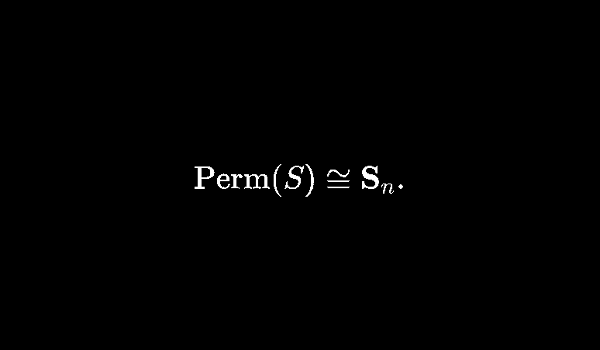

None

Predicted formula:


In [8]:
## ALB

image_path= "Jupyter_Notebooks/test_photos/zarhin.png"

image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
image = cv2.bitwise_not(image)
image = findPositions(image)
h, w, c = image.shape
aspect = h / w

# Thresholding
if w > 400:
    ret, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Downscaling big images
if w > 1200:
    new_w = 1000
    new_h = int(new_w * aspect)
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)


image_tensor = Image_Transforms.test_transform_with_padding_medium(image=np.array(image))['image'][:1]
print(display(transform(image_tensor)))



#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')



(116, 516, 3)


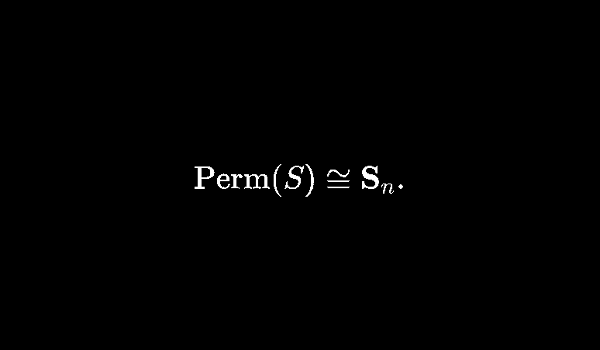

None

Predicted formula:
 <S> \mathrm { P e r m } ( S ) \simeq { \bf S } _ { n } . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [19]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/zarhin.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)


non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)
    
h,w,c = my_image.shape

if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)
    pass


print(my_image.shape)

my_image_tensor = dataset.image_transform_test_medium(image=np.array(my_image))['image'][:1]

print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

(152, 658, 3)


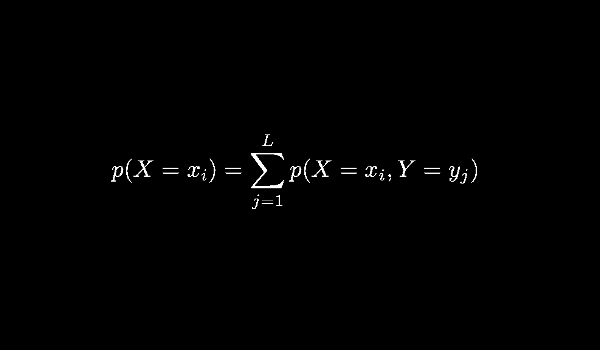

None

Predicted formula:
 <S> p ( X = x _ { i } ) = \sum _ { j = 1 } ^ { L } p ( X = x _ { i } , Y = y _ { j } ) <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [20]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_1.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)




non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)
    

    
h,w,c = my_image.shape

if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)



print(my_image.shape)
my_image_tensor = dataset.image_transform_test_medium(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

old 152 658
(17, 8) (620, 132)
new 152 658


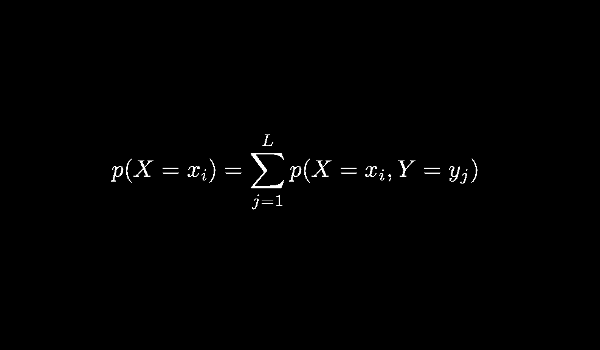

None

Predicted formula:
 <S> p ( X = x _ { i } ) = \sum _ { j = 1 } ^ { L } p ( X = x _ { i } , Y = y _ { j } ) <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [21]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_1.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)


h,w,c = my_image.shape
print('old',h,w)

non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left-1, top-1), (right+1, bottom+1), (0,0,0), 0)

print( (left, top), (right, bottom), )    

#Thresholding
ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)
    

h,w,c = my_image.shape
print('new',h,w)

if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)
h,w,c = my_image.shape
aspect = h/w


if w>1200:
    new_w = 1000
    new_h = int(new_w*aspect)
    my_image= cv2.resize(my_image, (new_w, new_h), interpolation= cv2.INTER_AREA)
    

#print(my_image.shape)

my_image_tensor = dataset.image_transform_test_medium(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

0.2303370786516854
(41, 178, 3)


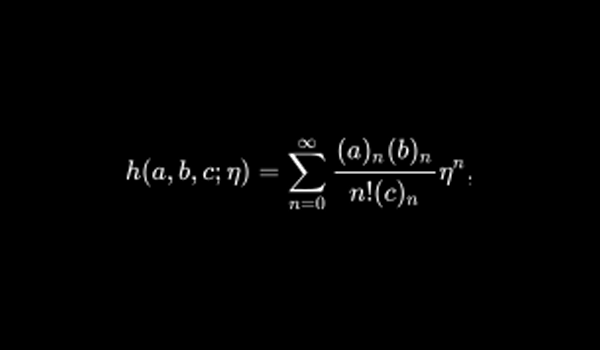

None

Predicted formula:
 <S> h ( a , b , c ; \eta ) = \sum _ { n = 0 } ^ { \infty } \frac { ( a ) _ { n } ( b ) _ { n } } { n ! ( c ) _ { n } } \eta ^ { n } . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [22]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/0a0df4c4229b725.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)


#Thresholding
#ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)



positions = np.nonzero(my_image)
top = positions[0].min()
bottom = positions[0].max()
left = positions[1].min()
right = positions[1].max()

my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)

h,w,c = my_image.shape
aspect = h/w
print(h/w)

if w>1200:
    new_w = 1000
    new_h = int(new_w*aspect)
    my_image= cv2.resize(my_image, (new_w, new_h), interpolation= cv2.INTER_AREA)
    

print(my_image.shape)


my_image_tensor = dataset.image_transform_test_small(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

(23, 57, 3)


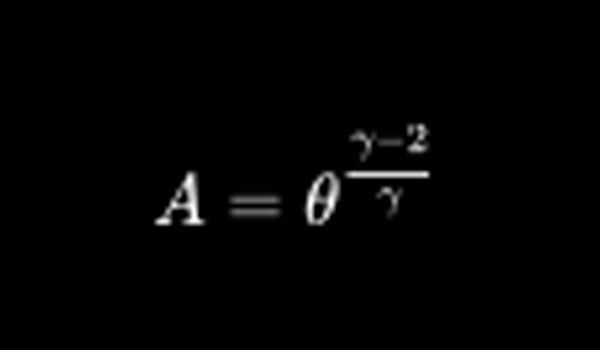

None

Predicted formula:
 <S> A = \theta ^ { \frac { \gamma - 2 } { \gamma } <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [23]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/0a0ebebfb1f6ab3.png"
my_image = Image.open(my_image_path)#.convert("L") 
my_image= np.asarray(my_image)
#my_image = cv2.imread(my_image_path)
#my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)




#Thresholding
#ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)


non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)
    


h,w,c = my_image.shape

if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)

print(my_image.shape)

my_image_tensor = dataset.image_transform_test_xs(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))
model.eval()
print('\nPredicted formula:')
with torch.no_grad():
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

(320, 1080, 3)


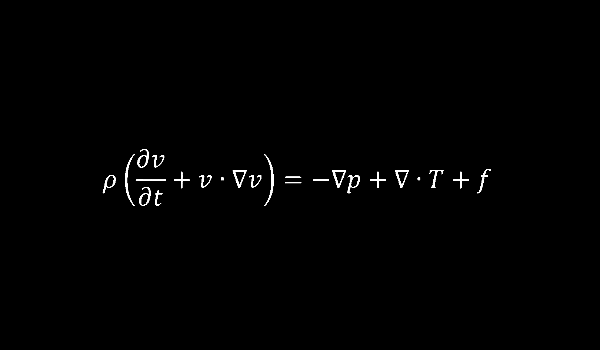

None

Predicted formula:
 <S> \rho \left( \frac { \partial v } { \partial t } + v \cdot \nabla v \right) = - \nabla p + \nabla \cdot T + f <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [24]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_3.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)




#Thresholding
#ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)


non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)
    


h,w,c = my_image.shape

if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)

print(my_image.shape)

my_image_tensor = dataset.image_transform_test_medium(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))
model.eval()
print('\nPredicted formula:')
with torch.no_grad():
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

0.1404494382022472
(140, 1000, 3)


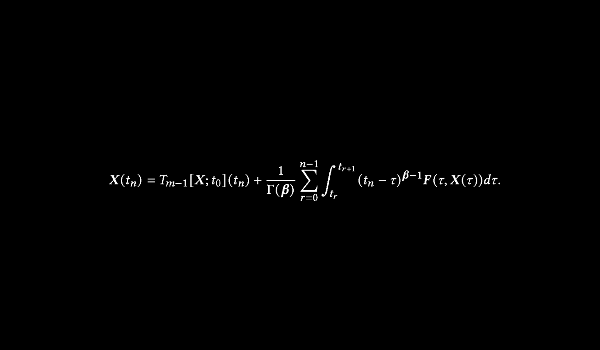

None

Predicted formula:
 <S> \chi _ { ( \mu _ { n } ) = \prod _ { m - 1 ! ( X ; t _ { 0 } ) ( t _ { n } ) + \frac { 1 } { \Gamma ( g ) } \sum _ { r = 0 } ^ { 2 - 1 } \int _ { t } ^ { t . 1 } f _ { a } - \tau ( \tau , X ( \tau ) d \tau } <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [25]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_14.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)




#Thresholding
#ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)


non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)



if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)
    

h,w,c = my_image.shape
aspect = h/w
print(h/w)

if w>1200:
    new_w = 1000
    new_h = int(new_w*aspect)
    my_image= cv2.resize(my_image, (new_w, new_h), interpolation= cv2.INTER_AREA)
    

print(my_image.shape)

my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))
model.eval()
print('\nPredicted formula:')
with torch.no_grad():
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

(202, 1774, 3)
(136, 1200, 3)


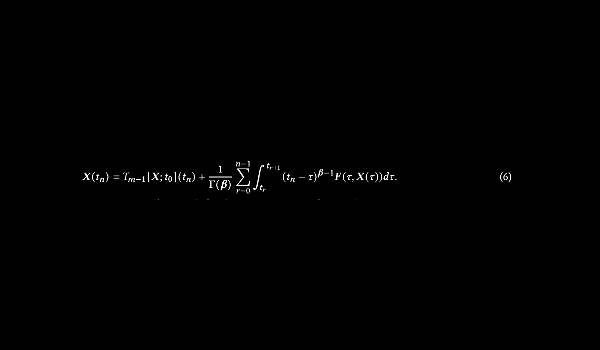

None

Predicted formula:
 <S> X ( r _ { \mu } ) = l _ { a - i \chi _ { i } 0 } ( t _ { o } ) + \frac { 1 } { 1 ( g ) } \sum _ { + 0 } ^ { 4 + } f _ { a } - \tau ) \theta _ { i } ^ { \ell + } r ( \tau , v ) d \tau } \qquad \qquad \qquad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad X ( b ) <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [16]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_13.png"
#my_image = Image.open(my_image_path)#.convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)




#Thresholding
#ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)


non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)
    


h,w,c = my_image.shape

if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)

    
    
h,w,c = my_image.shape
aspect = h/w
print(my_image.shape)

if w>1600:
    new_w = 1200
    new_h = int(new_w*aspect)
    my_image= cv2.resize(my_image, (new_w, new_h), interpolation= cv2.INTER_AREA)
    
print(my_image.shape)


my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))
model.eval()
print('\nPredicted formula:')
with torch.no_grad():
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

(188, 1950, 3)
(96, 1000, 3)


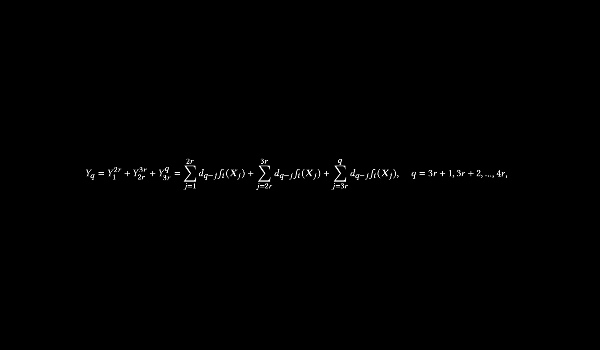

None

Predicted formula:
 <S> \chi _ { v } \rightarrow \gamma ^ { \prime } * \gamma _ { \nu } ^ { p } * \gamma _ { \nu } ^ { 9 } . \sum _ { x i } e \int _ { x l } v ^ { 9 } + \sum _ { z \nu } e \int _ { \sigma \mu \alpha \beta } + \sum _ { \varphi } ^ { 5 } A _ { \sigma \mu ( \alpha ) } \quad v ^ { * + \nu * + \gamma + \chi - s _ { 2 } - \omega . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [17]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_10.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)




#Thresholding
#ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)


non_zero = True

# Find first non_zero pixel and crop to it
if non_zero:
    positions = np.nonzero(my_image)
    top = positions[0].min()
    bottom = positions[0].max()
    left = positions[1].min()
    right = positions[1].max()

    my_image = cv2.rectangle(my_image, (left, top), (right, bottom), (0,0,0), 0)
print(my_image.shape)




if w>400:
    #Thresholding
    ret,my_image = cv2.threshold(my_image,127,255,cv2.THRESH_BINARY)
    
h,w,c = my_image.shape
aspect = h/w


if w>1600:
    new_w = 1000
    new_h = int(new_w*aspect)
    my_image= cv2.resize(my_image, (new_w, new_h), interpolation= cv2.INTER_AREA)
    

print(my_image.shape)

my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))
model.eval()
print('\nPredicted formula:')
with torch.no_grad():
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

In [18]:
# DISREGARD this uses wrong transformations

# Get image and label from train data -- change number for different ones
image_tensor, label = dataset.data_train[12]
transform = transforms.ToPILImage()
image = transform(image_tensor)

print('\nOriginal image and formula:')
display(image)
print(token_to_strings(label))
print('\nPredicted formula: \n')
with torch.no_grad():
    model.eval()
    prediction =  model.predict(image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(prediction),'\n')
print(display(Math(token_to_strings(prediction))))

AttributeError: 'Data_Module' object has no attribute 'data_train'